# Exploratory data analysis
    This kernel is to get familiar with the features and their relation, look for possible feature engineering
    To realize the meaning of features, please read the following website
* https://www.kaggle.com/c/data-science-bowl-2019/data
* https://www.kaggle.com/c/data-science-bowl-2019/discussion/117019#latest-680222

## kaggle example
* https://www.kaggle.com/c/data-science-bowl-2019/notebooks?sortBy=commentCount&group=everyone&search=EDA&page=1&pageSize=20&competitionId=16531

### Question:
* still not figure out how even_id relate to other features
* prediction of test is for last assessment session??

### Try new ploting tools:
* [plotly](https://plot.ly/python/)
* [seaborn](https://seaborn.pydata.org/index.html)

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

from utils import kaggle_util

In [2]:
# https://www.kaggle.com/robikscube/2019-data-science-bowl-an-introduction

import seaborn as sns
sns.set_style("whitegrid")
my_pal = sns.color_palette(n_colors=10)

## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_option.html#pandas.get_option
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)


In [3]:
%%time

# read data
train, test, train_labels, specs, sample_submission = kaggle_util.read_data()
train2, test2, train_labels2 = train.copy(), test.copy(), train_labels.copy()

# get usefull dict with maping encode, we implement "label encoding" on category features
train2, test2, train_labels2, win_code, list_of_user_activities, list_of_event_code,\
activities_labels, assess_titles, list_of_event_id, all_title_event_code = kaggle_util.encode_title(train2, test2, train_labels2)

# tranform function to get the train and test set
reduce_train, reduce_test, categoricals = kaggle_util.get_train_and_test(train2, test2, win_code, list_of_user_activities, list_of_event_code,\
activities_labels, assess_titles, list_of_event_id, all_title_event_code)


Reading train.csv file....
Training.csv file have 11341042 rows and 11 columns
Reading test.csv file....
Test.csv file have 1156414 rows and 11 columns
Reading train_labels.csv file....
Train_labels.csv file have 17690 rows and 7 columns
Reading specs.csv file....
Specs.csv file have 386 rows and 3 columns
Reading sample_submission.csv file....
Sample_submission.csv file have 1000 rows and 2 columns



CPU times: user 6min 26s, sys: 11.1 s, total: 6min 37s
Wall time: 6min 35s


In [4]:
# a glimps in these files

print(train.dtypes)
display(train)
display(train2)
display(train_labels)
display(reduce_train)
display(specs)

event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count         int64
event_code          int64
game_time           int64
title              object
type               object
world              object
dtype: object


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK
...,...,...,...,...,...,...,...,...,...,...,...
11341037,ab3136ba,c09b94eebfdf50a6,2019-10-10T15:11:15.584Z,"{""description"":""Tap another dinosaur."",""identi...",fffc0583,66,3110,118615,Dino Dive,Game,MAGMAPEAK
11341038,27253bdc,6ad8ab25003ef1b0,2019-10-10T15:12:17.364Z,"{""event_code"": 2000, ""event_count"": 1}",fffc0583,1,2000,0,Crystal Caves - Level 2,Clip,CRYSTALCAVES
11341039,27253bdc,71904dca23b982c6,2019-10-10T15:13:04.713Z,"{""event_code"": 2000, ""event_count"": 1}",fffc0583,1,2000,0,Crystal Caves - Level 3,Clip,CRYSTALCAVES
11341040,27253bdc,2267b18f069e875a,2019-10-10T15:13:54.545Z,"{""event_code"": 2000, ""event_count"": 1}",fffc0583,1,2000,0,Crystal Caves - Level 3,Clip,CRYSTALCAVES


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,title_event_code
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,5,Clip,2,Welcome to Lost Lagoon!_2000
1,27253bdc,17eeb7f223665f53,2019-09-06 17:54:17.519000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,13,Clip,0,Magma Peak - Level 1_2000
2,77261ab5,0848ef14a8dc6892,2019-09-06 17:54:56.302000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,34,Activity,0,Sandcastle Builder (Activity)_2000
3,b2dba42b,0848ef14a8dc6892,2019-09-06 17:54:56.387000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,34,Activity,0,Sandcastle Builder (Activity)_3010
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06 17:55:03.253000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,34,Activity,0,Sandcastle Builder (Activity)_3110
...,...,...,...,...,...,...,...,...,...,...,...,...
11341037,ab3136ba,c09b94eebfdf50a6,2019-10-10 15:11:15.584000+00:00,"{""description"":""Tap another dinosaur."",""identi...",fffc0583,66,3110,118615,25,Game,0,Dino Dive_3110
11341038,27253bdc,6ad8ab25003ef1b0,2019-10-10 15:12:17.364000+00:00,"{""event_code"": 2000, ""event_count"": 1}",fffc0583,1,2000,0,29,Clip,3,Crystal Caves - Level 2_2000
11341039,27253bdc,71904dca23b982c6,2019-10-10 15:13:04.713000+00:00,"{""event_code"": 2000, ""event_count"": 1}",fffc0583,1,2000,0,42,Clip,3,Crystal Caves - Level 3_2000
11341040,27253bdc,2267b18f069e875a,2019-10-10 15:13:54.545000+00:00,"{""event_code"": 2000, ""event_count"": 1}",fffc0583,1,2000,0,42,Clip,3,Crystal Caves - Level 3_2000


,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.000000,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.000000,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.000000,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.500000,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.000000,3
...,...,...,...,...,...,...,...
17685,c996482b11d149dd,ffc90c32,Bird Measurer (Assessment),1,0,1.000000,3
17686,b05a02b52d5c1f4c,ffd2871d,Cauldron Filler (Assessment),1,0,1.000000,3
17687,5448d652309a6324,ffeb0b1b,Cauldron Filler (Assessment),1,2,0.333333,1
17688,a6885ab824fbc32c,ffeb0b1b,Mushroom Sorter (Assessment),0,1,0.000000,0


,Clip,Activity,Assessment,Game,acc_Mushroom Sorter (Assessment),acc_Cauldron Filler (Assessment),acc_Chest Sorter (Assessment),acc_Bird Measurer (Assessment),acc_Cart Balancer (Assessment),2050,4100,4230,5000,4235,2060,4110,5010,2070,2075,2080,2081,2083,3110,4010,3120,3121,4020,4021,4022,4025,4030,4031,3010,4035,4040,3020,3021,4045,2000,4050,2010,2020,4070,2025,2030,4080,2035,2040,4090,4220,...,Chow Time_4095,Air Show_2020,Chicken Balancer (Activity)_4030,Bird Measurer (Assessment)_3021,Bug Measurer (Activity)_4030,Bottle Filler (Activity)_4080,Cart Balancer (Assessment)_3121,Bottle Filler (Activity)_4090,Sandcastle Builder (Activity)_4080,Bottle Filler (Activity)_2010,Air Show_4080,Pirate's Tale_2000,Flower Waterer (Activity)_4020,Chest Sorter (Assessment)_2030,Happy Camel_2080,Crystals Rule_2030,Cauldron Filler (Assessment)_3020,Scrub-A-Dub_2030,Bird Measurer (Assessment)_4035,Chow Time_4030,Cauldron Filler (Assessment)_4100,All Star Sorting_2000,Watering Hole (Activity)_4025,Bird Measurer (Assessment)_4030,Bubble Bath_2080,Crystals Rule_3020,Flower Waterer (Activity)_2000,Sandcastle Builder (Activity)_4020,Mushroom Sorter (Assessment)_2000,Happy Camel_2020,Chest Sorter (Assessment)_3120,Crystals Rule_2000,Mushroom Sorter (Assessment)_4030,Bubble Bath_2030,Cauldron Filler (Assessment)_4040,Honey Cake_2000,Chicken Balancer (Activity)_4020,installation_id,session_title,accumulated_correct_attempts,accumulated_uncorrect_attempts,duration_mean,accumulated_accuracy,accuracy_group,0,1,2,3,accumulated_accuracy_group,accumulated_actions
0,11,3,0,4,-1.0,-1.000000,-1.0,-1.0,-1.0,6,0,0,0,0,0,0,0,0,0,4,1,2,77,4,7,9,92,14,31,19,121,0,79,1,0,7,9,0,18,0,0,20,94,4,18,0,0,6,4,0,...,0,0,0,0,0,0,0,0,0,0,0,1,18,0,0,0,0,15,0,0,0,3,0,0,0,0,1,7,0,0,0,0,0,0,0,0,0,0006a69f,39,0,0,0.00,0.000000,3,0,0,0,0,0.0,647
1,14,4,1,6,1.0,-1.000000,-1.0,-1.0,-1.0,6,5,0,0,0,1,2,0,1,0,4,1,2,223,6,11,16,127,14,31,37,149,0,226,6,2,11,16,0,25,0,1,26,156,5,22,0,1,6,4,0,...,0,2,0,0,20,0,0,0,0,0,0,1,18,0,0,2,0,15,0,0,0,3,0,0,0,1,1,7,1,0,0,1,8,0,0,0,0,0006a69f,21,1,0,39.00,1.000000,0,0,0,0,1,3.0,1143
2,14,4,2,6,1.0,-1.000000,-1.0,0.0,-1.0,6,5,0,0,0,1,13,0,1,0,4,1,2,225,6,22,16,127,14,31,59,171,0,228,6,2,22,16,0,26,0,1,27,160,5,22,0,1,6,4,0,...,0,2,0,0,20,0,0,0,0,0,0,1,18,0,0,2,0,15,0,0,0,3,0,22,0,1,1,7,1,0,0,1,8,0,0,0,0,0006a69f,39,1,11,65.50,0.500000,3,1,0,0,1,1.5,1230
3,24,9,4,10,0.0,-1.000000,-1.0,0.0,-1.0,9,6,0,5,0,2,13,5,2,0,8,2,5,336,10,25,40,243,29,45,93,314,6,341,14,9,25,40,2,47,0,2,52,348,9,43,0,5,10,4,9,...,0,2,0,0,20,0,0,0,0,0,0,2,37,0,0,2,0,21,0,0,0,4,9,22,1,1,2,11,3,0,0,1,11,2,0,0,0,0006a69f,39,2,11,41.25,0.500000,2,2,0,0,2,1.5,2159
4,28,10,5,13,0.5,-1.000000,-1.0,0.0,-1.0,9,12,0,5,0,3,13,5,2,1,8,2,5,457,12,30,53,277,29,45,105,331,6,463,15,10,30,53,2,56,0,3,64,387,10,53,0,6,10,4,9,...,0,5,0,0,30,0,0,0,0,0,0,2,37,0,0,9,0,21,0,0,0,4,9,22,1,3,2,11,4,0,0,3,18,2,0,0,0,0006a69f,21,3,12,39.20,0.500000,3,2,0,1,2,1.6,2586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17685,26,7,5,11,1.0,1.000000,-1.0,1.0,1.0,3,18,2,3,2,4,1,2,1,3,6,2,4,262,12,16,64,192,13,11,34,208,11,265,20,19,16,66,2,49,0,4,62,512,5,55,0,3,4,0,5,...,0,3,33,1,0,0,1,0,0,0,0,1,12,0,2,9,0,6,1,9,1,1,4,13,1,4,1,4,2,3,0,1,10,1,1,1,27,ffc90c32,14,5,2,34.40,0.866667,3,0,1,0,4,2.6,1963
17686,3,2,0,3,-1.0,-1.000000,-1.0,-1.0,-1.0,0,0,7,0,7,2,0,0,2,0,1,0,1,102,3,7,23,95,15,0,0,117,12,102,22,7,7,24,2,8,0,0,34,250,2,31,0,1,0,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,0,0,0,0,0,1,0,0,0,ffd2871d,19,0,0,0.00,0.000000,3,0,0,0,0,0.0,888
17687,11,3,0,4,-1.0,-1.000000,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,6,98,20,83,25,0,0,162,0,101,54,0

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct)...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
1,df4fe8b6,The end of system-initiated feedback (Incorrec...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
2,3babcb9b,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
3,7f0836bf,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
4,ab3136ba,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
...,...,...,...
381,29f54413,The start round event is triggered at the star...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
382,06372577,The start tutorial event is triggered at the s...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
383,2a444e03,This event occurs when the player picks up a w...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
384,9e6b7fb5,This event occurs when the player clicks on th...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


In [5]:
# no missing value
# display(train.isnull().sum())
# display(test.isnull().sum())
# display(train_labels.isnull().sum())
# display(specs.isnull().sum())


In [6]:
train[(train['installation_id']=='0006a69f')]
train[(train['installation_id']=='0006a69f') & (train['game_session']=='2b9d5af79bcdb79f')]

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
1540,77261ab5,2b9d5af79bcdb79f,2019-08-06T04:58:14.538Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1541,b2dba42b,2b9d5af79bcdb79f,2019-08-06T04:58:14.615Z,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1542,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:16.680Z,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1543,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:18.474Z,"{""coordinates"":{""x"":863,""y"":237,""stage_width"":...",0006a69f,4,4070,3937,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1544,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:19.365Z,"{""coordinates"":{""x"":817,""y"":617,""stage_width"":...",0006a69f,5,4070,4820,Sandcastle Builder (Activity),Activity,MAGMAPEAK
...,...,...,...,...,...,...,...,...,...,...,...
1637,37937459,2b9d5af79bcdb79f,2019-08-06T04:59:42.203Z,"{""castles_placed"":[{""size"":3,""position"":{""x"":5...",0006a69f,98,4090,87658,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1638,b2dba42b,2b9d5af79bcdb79f,2019-08-06T04:59:42.203Z,"{""description"":""Drag the shovel to the molds t...",0006a69f,99,3010,87658,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1639,1bb5fbdb,2b9d5af79bcdb79f,2019-08-06T04:59:44.270Z,"{""description"":""Drag the shovel to the molds t...",0006a69f,100,3110,89733,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1640,37937459,2b9d5af79bcdb79f,2019-08-06T04:59:44.311Z,"{""castles_placed"":[{""size"":3,""position"":{""x"":5...",0006a69f,101,4090,89767,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [7]:
def describe_category(s: pd.Series):
    print('{} kinds of category'.format(s.nunique()))
    
    # plot histgram
    s.hist(bins=s.nunique())
    plt.show()
    plt.clf()

In [8]:
display(train.title.unique())

array(['Welcome to Lost Lagoon!', 'Magma Peak - Level 1',
       'Sandcastle Builder (Activity)', 'Scrub-A-Dub',
       'Magma Peak - Level 2', 'Dino Drink', 'Tree Top City - Level 1',
       'Ordering Spheres', 'Watering Hole (Activity)', 'Slop Problem',
       'All Star Sorting', 'Costume Box', 'Fireworks (Activity)',
       '12 Monkeys', 'Tree Top City - Level 2',
       'Flower Waterer (Activity)', "Pirate's Tale",
       'Mushroom Sorter (Assessment)', 'Air Show', 'Treasure Map',
       'Tree Top City - Level 3', 'Crystals Rule', 'Rulers',
       'Bug Measurer (Activity)', 'Bird Measurer (Assessment)',
       'Bubble Bath', 'Bottle Filler (Activity)', 'Dino Dive',
       'Crystal Caves - Level 1', 'Chow Time',
       'Cauldron Filler (Assessment)', 'Balancing Act',
       'Crystal Caves - Level 2', 'Crystal Caves - Level 3',
       'Chicken Balancer (Activity)', 'Lifting Heavy Things',
       'Pan Balance', 'Happy Camel', 'Honey Cake',
       'Cart Balancer (Assessment)', 'Heavy, 

## 檢查類別型變量分布

42 kinds of category


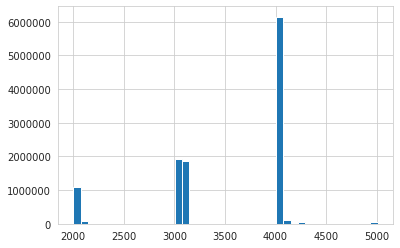

44 kinds of category


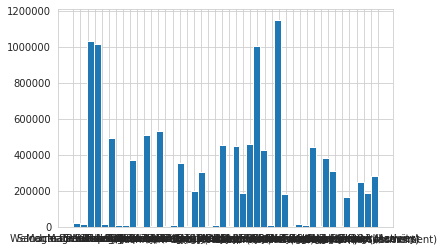

4 kinds of category


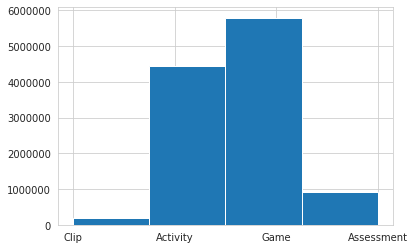

4 kinds of category


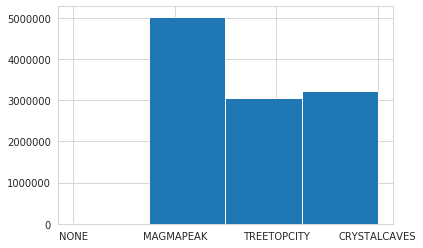

<Figure size 432x288 with 0 Axes>

In [9]:
describe_category(train.event_code)
describe_category(train.title)
describe_category(train.type)
describe_category(train.world)

In [10]:
def describe_category2(s: pd.Series):
    print('{} kinds of category'.format(s.nunique()))
    # how many s in one category, numeric version of histgram
    print(s.value_counts().value_counts())
    
    s.value_counts().hist(bins=100)
    plt.show()
    plt.clf()

303319 kinds of category
1       185970
3         2375
35        1434
2         1335
30        1297
         ...  
1233         1
1333         1
1077         1
886          1
767          1
Name: game_session, Length: 958, dtype: int64


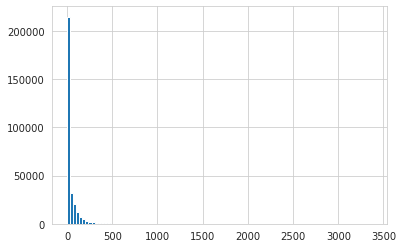

17000 kinds of category
2       1185
1       1179
3        776
4        463
5        263
        ... 
1448       1
1464       1
3513       1
1496       1
1607       1
Name: installation_id, Length: 2912, dtype: int64


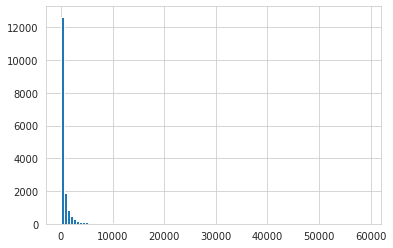

<Figure size 432x288 with 0 Axes>

In [11]:
## most game_session has less than 500 rows
describe_category2(train.game_session)

## most installation_id has less than 5 rows
describe_category2(train.installation_id)

## Compare distribution between train and test

In [12]:
def count_nunique(df: pd.DataFrame):
    for c in df.columns:
        if c!= 'timestamp' or c!= 'event_data':
            print(c,df[c].nunique())

In [13]:
print(train.shape)
print(test.shape)

print("\nTraining data unique value count")
print(count_nunique(train[['event_id','game_session','installation_id','event_count']]))
  
print("\nTesting data unique value count")
print(count_nunique(test[['event_id','game_session','installation_id','event_count']]))

(11341042, 11)
(1156414, 11)

Training data unique value count
event_id 384
game_session 303319
installation_id 17000
event_count 3368
None

Testing data unique value count
event_id 365
game_session 28445
installation_id 1000
event_count 4456
None


## 檢查資料有沒有哪些問題

In [14]:
## 檢查train_label是否包含train所有的assessment結果

## check if train_labels contain all assessment game session in train
train_ass_sessoin = train[train['type']=='Assessment']['game_session'].unique()
train_label_ass_session = train_labels.game_session.values
print(train_ass_sessoin.shape)
print(train_label_ass_session.shape)

not_in_train_label_ass_session = []
for s in train_ass_sessoin:
    if s not in train_label_ass_session:
        not_in_train_label_ass_session.append(s)

## 有3549個assessment game session不在train_labels，因為沒有valid attempt，見下方
print(len(not_in_train_label_ass_session))
no_label_ass_session = train[train['game_session'].isin(not_in_train_label_ass_session)]

# valid event_code of 'Bird Measurer (Assessment)' is 4110
# so every assessment with valid attempts is included in train_label!!!
display(no_label_ass_session[no_label_ass_session['event_code']==4100])
display(no_label_ass_session[no_label_ass_session['event_code']==4110])

(21239,)
(17690,)
3549


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
5647267,070a5291,e3436dd3c423a14f,2019-08-21T13:35:44.250Z,"{""correct"":false,""hats"":[5,4,8],""event_count"":...",7d351303,67,4100,97693,Bird Measurer (Assessment),Assessment,TREETOPCITY
5647287,070a5291,e3436dd3c423a14f,2019-08-21T13:36:36.161Z,"{""correct"":true,""hats"":[4,8,5],""event_count"":8...",7d351303,87,4100,149598,Bird Measurer (Assessment),Assessment,TREETOPCITY
9239261,070a5291,d22a979eaed378ed,2019-10-01T14:46:22.861Z,"{""correct"":true,""hats"":[4,8,5],""event_count"":2...",cf6792b9,29,4100,35889,Bird Measurer (Assessment),Assessment,TREETOPCITY


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world


In [15]:
## 看title對應其他特徵的關係

## check title's world respectively
titles = train_labels.title.unique()
for title in titles:
    print(title,train[train['title']==title]['world'].unique())
    
## check title's event_code respectively
for title in titles:
    print(title,train[train['title']==title]['event_code'].unique())

## check the number of user in each title
for title in titles:
    print(title,train[train['title']==title]['installation_id'].nunique())

Mushroom Sorter (Assessment) ['TREETOPCITY']
Bird Measurer (Assessment) ['TREETOPCITY']
Cauldron Filler (Assessment) ['MAGMAPEAK']
Chest Sorter (Assessment) ['CRYSTALCAVES']
Cart Balancer (Assessment) ['CRYSTALCAVES']
Mushroom Sorter (Assessment) [2000 2025 3010 3110 4025 3021 3121 4070 2035 2020 4030 4020 4040 4100
 2030 2010 3020 3120 4035 4090 4080]
Bird Measurer (Assessment) [2000 2020 3010 3110 4030 4025 4110 3020 3120 4070 3021 3121 2030 4020
 4100 2010 4040 4035 4090 4080]
Cauldron Filler (Assessment) [2000 2020 3010 4070 4030 4020 3110 4100 2030 3021 3121 4025 2010 3020
 3120 4035 4040 4090 4080]
Chest Sorter (Assessment) [2000 2020 3010 3110 4070 4030 4025 4040 4020 4035 4100 3020 3120 4090
 3021 3121 2030 2010 4080]
Cart Balancer (Assessment) [2000 2020 3010 4030 4020 3110 4100 3021 3121 2030 2010 4040 4070 4035
 3020 3120 4090 4080]
Mushroom Sorter (Assessment) 2310
Bird Measurer (Assessment) 1710
Cauldron Filler (Assessment) 2253
Chest Sorter (Assessment) 1985
Cart Balancer

In [16]:
## 確認Assessment的題目有哪些
print(train[train['type']=='Assessment']['title'].unique())

## event_id 與其他特徵對應關係，就是唯一對應一種event_code
print(train[train['event_id']=='070a5291']['title'].unique())
print(train[train['event_id']=='070a5291']['type'].unique())
print(train[train['event_id']=='070a5291']['world'].unique())
print(train[train['event_id']=='070a5291']['event_code'].unique())
# print(train[train['event_id']=='070a5291']['event_data'].unique())

['Mushroom Sorter (Assessment)' 'Bird Measurer (Assessment)'
 'Cauldron Filler (Assessment)' 'Cart Balancer (Assessment)'
 'Chest Sorter (Assessment)']
['Bird Measurer (Assessment)']
['Assessment']
['TREETOPCITY']
[4100]


## TODO
Plot!!!!!!

## 根據不同的特徵畫出其相對於其他特徵的圖

ex: installation_id, event_id, game_session, title, type, world

event_id的研究:
<br>看spec.csv看event_id有哪些可以抽取的特徵(目前是直接丟棄)，要透過畫圖找event_id有哪些data是比較少缺失值且跟預測目標相關的

研究使用者行為:
<br>觀測同一個使用者的記錄，查看有哪些pattern，試著找出與預測目標相關的特徵
<br>ex:分析使用者timestamp上表現
time stamp v.s. accuracy group, num
user v.s. time stamp range


In [17]:
train

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK
...,...,...,...,...,...,...,...,...,...,...,...
11341037,ab3136ba,c09b94eebfdf50a6,2019-10-10T15:11:15.584Z,"{""description"":""Tap another dinosaur."",""identi...",fffc0583,66,3110,118615,Dino Dive,Game,MAGMAPEAK
11341038,27253bdc,6ad8ab25003ef1b0,2019-10-10T15:12:17.364Z,"{""event_code"": 2000, ""event_count"": 1}",fffc0583,1,2000,0,Crystal Caves - Level 2,Clip,CRYSTALCAVES
11341039,27253bdc,71904dca23b982c6,2019-10-10T15:13:04.713Z,"{""event_code"": 2000, ""event_count"": 1}",fffc0583,1,2000,0,Crystal Caves - Level 3,Clip,CRYSTALCAVES
11341040,27253bdc,2267b18f069e875a,2019-10-10T15:13:54.545Z,"{""event_code"": 2000, ""event_count"": 1}",fffc0583,1,2000,0,Crystal Caves - Level 3,Clip,CRYSTALCAVES


different id cnt 17000
installation_id
597e5164        1
d8e7cd55        1
5c6c4659        1
a71f1370        1
f361103a        1
            ...  
c9ea32e9    30402
cff5a334    30918
d25338cb    31826
4d7d3d97    32749
f1c21eda    58988
Length: 17000, dtype: int64


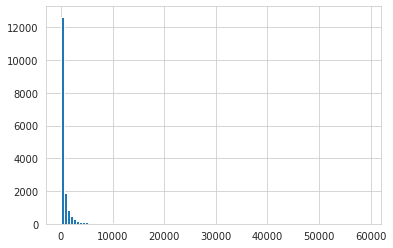

installation_id
89a62425       1
12a2ccfc       1
f23f7ef2       1
f23edefc       1
424184cf       1
            ... 
4d7d3d97     760
cff5a334     839
08987c08     990
9f399a3a    1190
f1c21eda    1260
Name: game_session, Length: 17000, dtype: int64


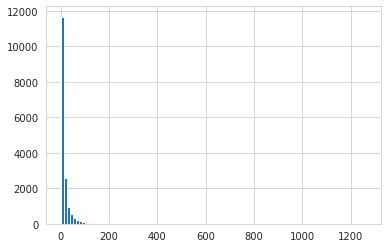

installation_id
73d4e56f     1
aca430f1     1
1eca1231     1
6ead1972     1
645b4d8b     1
            ..
5d99d6ed    44
5db0c556    44
5e607c7f    44
f9bfec85    44
9732f103    44
Name: title, Length: 17000, dtype: int64


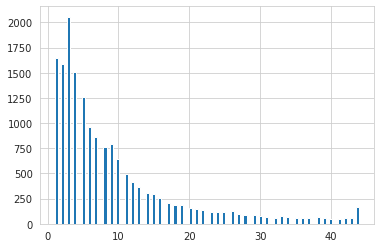

installation_id
46805690    1
4ef56490    1
4ef3a4f1    1
4eeda486    1
d1d192d4    1
           ..
48a5cf26    4
48a48308    4
83c0c067    4
48ca1b10    4
51f0924c    4
Name: type, Length: 17000, dtype: int64


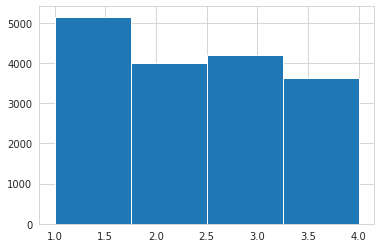

installation_id
65e940b5    1
62b3157f    1
e2417302    1
ba46fa0f    1
629daf5b    1
           ..
c0eb602c    4
59dac7bd    4
c0e6f71b    4
599e764d    4
7e8b1a05    4
Name: world, Length: 17000, dtype: int64


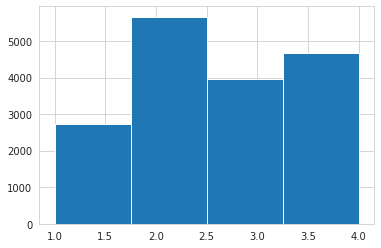

In [18]:
id_train = train['installation_id'].unique()
print('different id cnt',id_train.shape[0])

id_event_cnt = train.groupby(['installation_id']).apply(lambda s: s.shape[0])
print(id_event_cnt.sort_values())
id_event_cnt.hist(bins=100)
plt.show()

id_gs_cnt = train.groupby(['installation_id'])['game_session'].nunique()
print(id_gs_cnt.sort_values())
id_gs_cnt.hist(bins=100)
plt.show()

id_title_cnt = train.groupby(['installation_id'])['title'].nunique()
print(id_title_cnt.sort_values())
id_title_cnt.hist(bins=100)
plt.show()

id_type_cnt = train.groupby(['installation_id'])['type'].nunique()
print(id_type_cnt.sort_values())
id_type_cnt.hist(bins=4)
plt.show()

id_w_cnt = train.groupby(['installation_id'])['world'].nunique()
print(id_w_cnt.sort_values())
id_w_cnt.hist(bins=4)
plt.show()

## FE plot

In [19]:
reduce_train

,Clip,Activity,Assessment,Game,acc_Mushroom Sorter (Assessment),acc_Cauldron Filler (Assessment),acc_Chest Sorter (Assessment),acc_Bird Measurer (Assessment),acc_Cart Balancer (Assessment),2050,4100,4230,5000,4235,2060,4110,5010,2070,2075,2080,2081,2083,3110,4010,3120,3121,4020,4021,4022,4025,4030,4031,3010,4035,4040,3020,3021,4045,2000,4050,2010,2020,4070,2025,2030,4080,2035,2040,4090,4220,...,Chow Time_4095,Air Show_2020,Chicken Balancer (Activity)_4030,Bird Measurer (Assessment)_3021,Bug Measurer (Activity)_4030,Bottle Filler (Activity)_4080,Cart Balancer (Assessment)_3121,Bottle Filler (Activity)_4090,Sandcastle Builder (Activity)_4080,Bottle Filler (Activity)_2010,Air Show_4080,Pirate's Tale_2000,Flower Waterer (Activity)_4020,Chest Sorter (Assessment)_2030,Happy Camel_2080,Crystals Rule_2030,Cauldron Filler (Assessment)_3020,Scrub-A-Dub_2030,Bird Measurer (Assessment)_4035,Chow Time_4030,Cauldron Filler (Assessment)_4100,All Star Sorting_2000,Watering Hole (Activity)_4025,Bird Measurer (Assessment)_4030,Bubble Bath_2080,Crystals Rule_3020,Flower Waterer (Activity)_2000,Sandcastle Builder (Activity)_4020,Mushroom Sorter (Assessment)_2000,Happy Camel_2020,Chest Sorter (Assessment)_3120,Crystals Rule_2000,Mushroom Sorter (Assessment)_4030,Bubble Bath_2030,Cauldron Filler (Assessment)_4040,Honey Cake_2000,Chicken Balancer (Activity)_4020,installation_id,session_title,accumulated_correct_attempts,accumulated_uncorrect_attempts,duration_mean,accumulated_accuracy,accuracy_group,0,1,2,3,accumulated_accuracy_group,accumulated_actions
0,11,3,0,4,-1.0,-1.000000,-1.0,-1.0,-1.0,6,0,0,0,0,0,0,0,0,0,4,1,2,77,4,7,9,92,14,31,19,121,0,79,1,0,7,9,0,18,0,0,20,94,4,18,0,0,6,4,0,...,0,0,0,0,0,0,0,0,0,0,0,1,18,0,0,0,0,15,0,0,0,3,0,0,0,0,1,7,0,0,0,0,0,0,0,0,0,0006a69f,39,0,0,0.00,0.000000,3,0,0,0,0,0.0,647
1,14,4,1,6,1.0,-1.000000,-1.0,-1.0,-1.0,6,5,0,0,0,1,2,0,1,0,4,1,2,223,6,11,16,127,14,31,37,149,0,226,6,2,11,16,0,25,0,1,26,156,5,22,0,1,6,4,0,...,0,2,0,0,20,0,0,0,0,0,0,1,18,0,0,2,0,15,0,0,0,3,0,0,0,1,1,7,1,0,0,1,8,0,0,0,0,0006a69f,21,1,0,39.00,1.000000,0,0,0,0,1,3.0,1143
2,14,4,2,6,1.0,-1.000000,-1.0,0.0,-1.0,6,5,0,0,0,1,13,0,1,0,4,1,2,225,6,22,16,127,14,31,59,171,0,228,6,2,22,16,0,26,0,1,27,160,5,22,0,1,6,4,0,...,0,2,0,0,20,0,0,0,0,0,0,1,18,0,0,2,0,15,0,0,0,3,0,22,0,1,1,7,1,0,0,1,8,0,0,0,0,0006a69f,39,1,11,65.50,0.500000,3,1,0,0,1,1.5,1230
3,24,9,4,10,0.0,-1.000000,-1.0,0.0,-1.0,9,6,0,5,0,2,13,5,2,0,8,2,5,336,10,25,40,243,29,45,93,314,6,341,14,9,25,40,2,47,0,2,52,348,9,43,0,5,10,4,9,...,0,2,0,0,20,0,0,0,0,0,0,2,37,0,0,2,0,21,0,0,0,4,9,22,1,1,2,11,3,0,0,1,11,2,0,0,0,0006a69f,39,2,11,41.25,0.500000,2,2,0,0,2,1.5,2159
4,28,10,5,13,0.5,-1.000000,-1.0,0.0,-1.0,9,12,0,5,0,3,13,5,2,1,8,2,5,457,12,30,53,277,29,45,105,331,6,463,15,10,30,53,2,56,0,3,64,387,10,53,0,6,10,4,9,...,0,5,0,0,30,0,0,0,0,0,0,2,37,0,0,9,0,21,0,0,0,4,9,22,1,3,2,11,4,0,0,3,18,2,0,0,0,0006a69f,21,3,12,39.20,0.500000,3,2,0,1,2,1.6,2586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17685,26,7,5,11,1.0,1.000000,-1.0,1.0,1.0,3,18,2,3,2,4,1,2,1,3,6,2,4,262,12,16,64,192,13,11,34,208,11,265,20,19,16,66,2,49,0,4,62,512,5,55,0,3,4,0,5,...,0,3,33,1,0,0,1,0,0,0,0,1,12,0,2,9,0,6,1,9,1,1,4,13,1,4,1,4,2,3,0,1,10,1,1,1,27,ffc90c32,14,5,2,34.40,0.866667,3,0,1,0,4,2.6,1963
17686,3,2,0,3,-1.0,-1.000000,-1.0,-1.0,-1.0,0,0,7,0,7,2,0,0,2,0,1,0,1,102,3,7,23,95,15,0,0,117,12,102,22,7,7,24,2,8,0,0,34,250,2,31,0,1,0,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,0,0,0,0,0,1,0,0,0,ffd2871d,19,0,0,0.00,0.000000,3,0,0,0,0,0.0,888
17687,11,3,0,4,-1.0,-1.000000,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,6,98,20,83,25,0,0,162,0,101,54,0

## Feature engineering
* base on accumulate events(features)?
* and then?

In [20]:
## 計算一個session的總時間


## How to perform regression & optimize threshold?

## 記錄

一個game session對應到一個type

計算同一個world的歷史紀錄

分析使用者在不同world的表現相關性(Assessment表現)
分析使用者在不同world的歷史記錄相關性(是否
分析gametime對於使用者表現的影響
                      
                      
找event_data中是否有適合做成特徵工程的資訊(kernel中有把event_code全部取出，用event_code當所有含意)

不同world的記錄對

## Testing codes~

In [21]:
from collections import Counter
Counter(train[(train['installation_id']=='0006a69f') & (train['game_session']=='2b9d5af79bcdb79f')]['event_code'])

Counter({2000: 1,
         3010: 20,
         4070: 18,
         3110: 19,
         4030: 21,
         4021: 14,
         4020: 7,
         4090: 2})